<a href="https://colab.research.google.com/github/KarinaKarina6/NLP_HWs/blob/HW_1/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install datasets
!pip install transformers > None

from datasets import load_dataset
from transformers import pipeline
from collections import Counter
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 37.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


Задача в том, чтобы создать вопросно-ответную систему.
Взят набор данных  SQuAD — это широко используемый набор данных, содержащий вопросы, заданные краудворкерами к набору статей Википедии, где ответом на каждый вопрос является фрагмент текста из соответствующей статьи.

In [4]:
squad = load_dataset("squad", split="train[:5000]")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [7]:
squad[6]

{'id': '5733bf84d058e614000b61bf',
 'title': 'University_of_Notre_Dame',
 'context': "As at most other universities, Notre Dame's students run a number of news media outlets. The nine student-run outlets include three newspapers, both a radio and television station, and several magazines and journals. Begun as a one-page journal in September 1876, the Scholastic magazine is issued twice monthly and claims to be the oldest continuous collegiate publication in the United States. The other magazine, The Juggler, is released twice a year and focuses on student literature and artwork. The Dome yearbook is published annually. The newspapers have varying publication interests, with The Observer published daily and mainly reporting university and other news, and staffed by students from both Notre Dame and Saint Mary's College. Unlike Scholastic and The Dome, The Observer is an independent publication and does not have a faculty advisor or any editorial oversight from the University. In 1987, 

In [13]:
squad[4999]

{'id': '56d0875b234ae51400d9c348',
 'title': 'Solar_energy',
 'context': 'Greenhouses convert solar light to heat, enabling year-round production and the growth (in enclosed environments) of specialty crops and other plants not naturally suited to the local climate. Primitive greenhouses were first used during Roman times to produce cucumbers year-round for the Roman emperor Tiberius. The first modern greenhouses were built in Europe in the 16th century to keep exotic plants brought back from explorations abroad. Greenhouses remain an important part of horticulture today, and plastic transparent materials have also been used to similar effect in polytunnels and row covers.',
 'question': 'What do greenhouses do with solar energy?',
 'answers': {'text': ['convert solar light to heat'], 'answer_start': [12]}}

Данные чистые, опечаток, артефактов и ошибок кодировки нет.
Посмотрим, на какие темы больше всего данных.

In [20]:
 topic_freq = Counter(squad['title'])

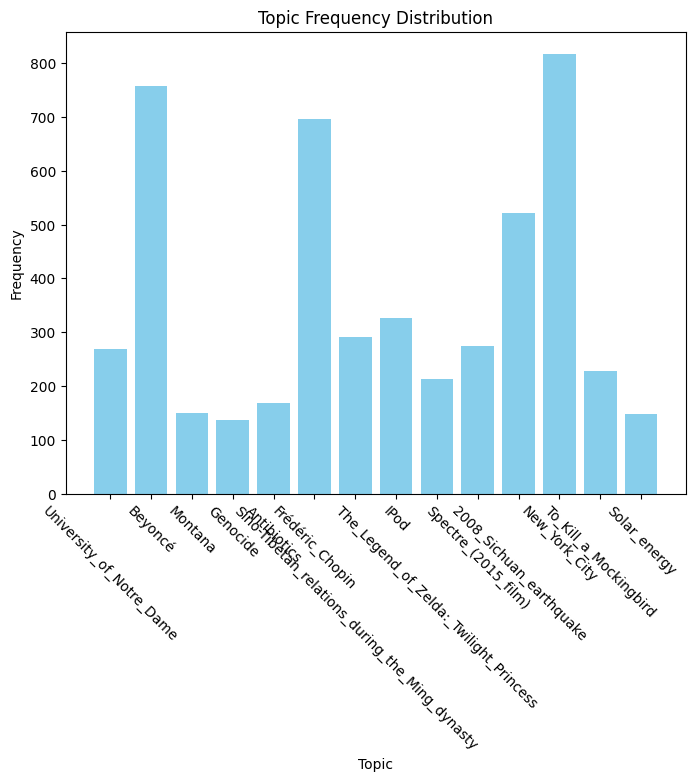

In [32]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(topic_freq)), list(topic_freq.values()), tick_label=list(topic_freq.keys()), color='skyblue')
plt.tick_params(axis='x', rotation=-45)
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Topic Frequency Distribution')
plt.show()

Больше всего данных по темам 'New_York_City', 'Beyoncé', 'Frédéric_Chopin' и '2008_Sichuan_earthquake'.